In [13]:
import numpy as np
import pandas as pd
#pd.set_option('display.width',300)
#pd.set_option('display.max_columns',10)
#pd.set_option('display.notebook_repr_html', True)

In [14]:
df=pd.read_csv("all.csv", header=None,
               names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 'genre_urls', 'dir','rating_count', 'name'],
)
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008.0,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003.0,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005.0,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960.0,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813.0,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


In [27]:
print df.dtypes
df.columns

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object


Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name'], dtype='object')

In [31]:
mylist=['hi','hello']
print mylist
yourlist=np.array(mylist)
print yourlist
yourlist

['hi', 'hello']
['hi' 'hello']


array(['hi', 'hello'], 
      dtype='|S5')

In [32]:
print df.shape
print df.shape[0]
print type(df)
print type(df.rating)
df.shape[1]

(6000, 10)
6000
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


10

In [43]:
print np.sum(df.rating>3)
print df[df.rating<3]
print df.query('rating<3')

5994
      rating review_count        isbn         booktype                                         author_url    year                                         genre_urls                                           dir rating_count                                  name
2609    2.90            8         NaN  good_reads:book  https://www.goodreads.com/author/show/7707820....  2013.0  /genres/romance|/genres/realistic-fiction|/gen...  dir27/19546932-how-to-be-a-perfect-girl.html           31              How To Be A Perfect Girl
3738    2.00          368  0983650322  good_reads:book  https://www.goodreads.com/author/show/9414.Vic...  2011.0  /genres/young-adult|/genres/science-fiction|/g...            dir38/12393909-revealing-eden.html          688  Revealing Eden (Save the Pearls, #1)
5844    2.97         1399  0395083621  good_reads:book  https://www.goodreads.com/author/show/30691.Ad...  1925.0  /genres/history|/genres/non-fiction|/genres/bi...                   dir59/54270.Mein_Kampf.htm

In [64]:
df[df.year.isnull()]
print np.sum(df.year.isnull())
df1=df[df.year.notnull()]
print np.sum(df1.year.notnull())
df1.shape

7
5993


(5993, 10)

In [69]:
df1['year']=df1.year.astype(int)
print df1.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object


/Users/xuhuan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


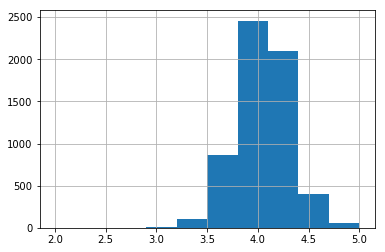

In [74]:
%matplotlib inline
df1.rating.hist()

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
df_mean_rating=df1.rating.mean()
print df_mean_rating
np_mean_rating=np.mean(df1.rating)
print np.median(df1.rating)

4.04199733022
4.05


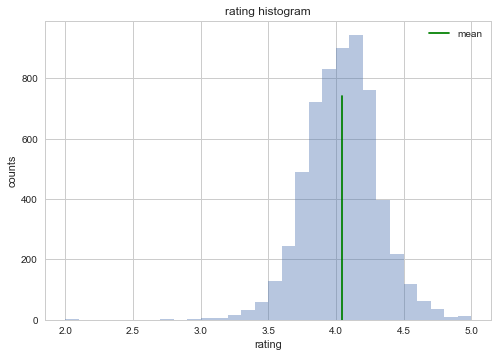

In [103]:
sns.set_context('notebook')
with sns.axes_style('whitegrid'):
    df1.rating.hist(bins=30,alpha=0.4)
    plt.axvline(df_mean_rating,0,0.75,color='g',label='mean')
    plt.title('rating histogram')
    plt.xlabel('rating')
    plt.ylabel('counts')
    plt.legend()

/Users/xuhuan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


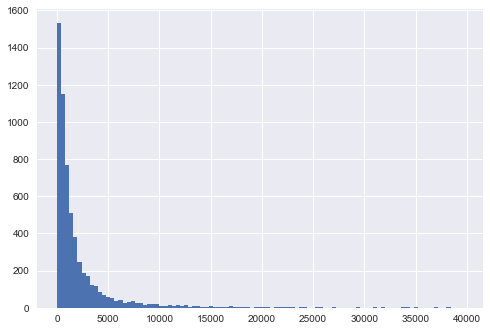

In [107]:
df1['review_count']=df1.review_count.astype(int)
df1.review_count.hist(bins=np.arange(0,40000,400))

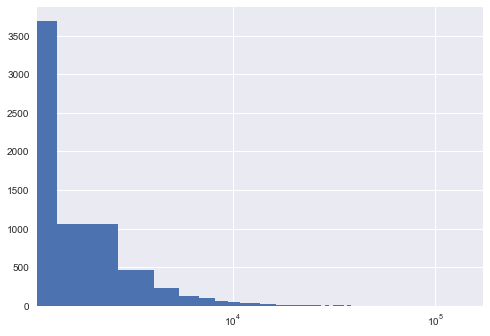

In [110]:
df1.review_count.hist(bins=100)
plt.xscale('log')

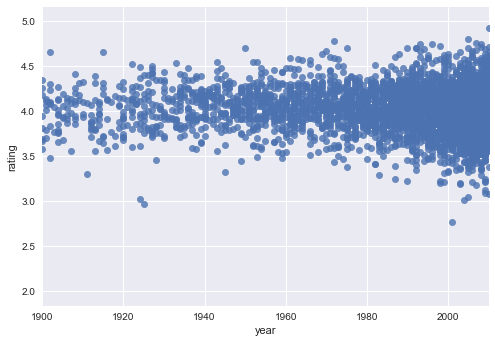

In [117]:
plt.scatter(df1.year,df1.rating,lw=0,alpha=0.8)
plt.xlim([1900,2010])
plt.xlabel('year')
plt.ylabel('rating')

<type 'list'>


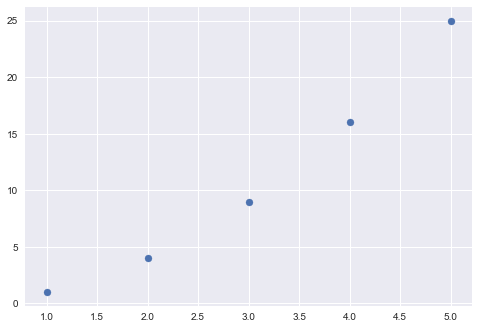

In [124]:
alist=[1,2,3,4,5]
asquaredlist=[i*i for i in alist]
print type(alist)
plt.scatter(alist,asquaredlist)

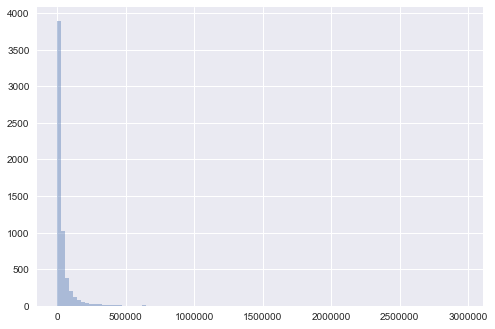

In [141]:
#df1['rating_count']=df1.rating_count.astype(int)
#df1.rating_count.values
plt.hist(df1.rating_count,bins=100,alpha=0.4);